In [6]:
!pip3 install imblearn

     |████████████████████████████████| 206 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('Desktop/scoring.csv')
df

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27,PEP07,score,final_score,risk
0,0,9944,1,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,2.1,3.44,mid
1,1,6179,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
2,2,702,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
3,3,9970,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.8,1.31,low
4,4,6126,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,26254,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.7,1.15,low
9497,9497,26078,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.7,1.15,low
9498,9498,47966,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.9,1.48,low
9499,9499,33880,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.9,1.48,low


In [101]:
def f(df):
    if df['risk'] == 'low':
        val = 0
    elif df['risk'] == 'middle':
        val = 1
    else:
        val = 2
    return val

In [103]:
df['class']=df.apply(f, axis=1)
df['class']

0       2
1       0
2       0
3       0
4       0
       ..
9496    0
9497    0
9498    0
9499    0
9500    0
Name: class, Length: 9501, dtype: int64

In [79]:
df.corr()

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP21,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27,PEP07,score,final_score
Unnamed: 0,1.000000,0.111759,-0.740036,-0.260503,-0.208987,-0.201356,-0.072728,0.076438,0.065012,0.042297,...,0.150277,0.060156,0.039087,0.070459,0.025407,0.009518,-0.011210,NaN,0.093155,0.093352
id_PEP,0.111759,1.000000,-0.196680,0.020529,0.078979,0.021350,0.065554,0.051250,0.039181,0.007906,...,0.021015,0.013460,-0.016534,0.048750,0.011872,0.038010,-0.041382,NaN,0.011946,0.011898
PEP01,-0.740036,-0.196680,1.000000,-0.048068,-0.084906,-0.112912,-0.117054,-0.082411,-0.063797,-0.021685,...,-0.056948,-0.066352,-0.020996,-0.027838,-0.018801,-0.014089,0.019659,NaN,-0.104823,-0.105056
PEP02,-0.260503,0.020529,-0.048068,1.000000,0.017295,-0.054148,-0.072234,-0.023902,-0.018606,-0.034726,...,-0.016663,0.380017,0.088071,0.096360,0.071245,0.037194,0.056029,NaN,0.409180,0.409192
PEP03_avto,-0.208987,0.078979,-0.084906,0.017295,1.000000,0.045972,0.030894,-0.031552,-0.039397,-0.024139,...,-0.025149,-0.007950,-0.011847,0.013156,0.011924,0.020446,0.019520,NaN,0.107425,0.107708
PEP03_home,-0.201356,0.021350,-0.112912,-0.054148,0.045972,1.000000,0.128677,-0.094751,-0.065386,-0.046357,...,-0.050539,-0.081116,-0.040545,-0.031113,-0.010740,0.005491,0.004405,NaN,-0.093943,-0.093983
PEP03_land,-0.072728,0.065554,-0.117054,-0.072234,0.030894,0.128677,1.000000,-0.085484,-0.077298,-0.035148,...,-0.067838,-0.109299,-0.047603,-0.049165,-0.002096,-0.007982,0.003632,NaN,-0.143063,-0.143168
PEP04_adress,0.076438,0.051250,-0.082411,-0.023902,-0.031552,-0.094751,-0.085484,1.000000,0.657163,-0.036456,...,-0.032526,-0.031604,-0.027703,-0.027948,-0.017296,0.001264,-0.012031,NaN,0.130098,0.130224
PEP04_region,0.065012,0.039181,-0.063797,-0.018606,-0.039397,-0.065386,-0.077298,0.657163,1.000000,-0.020716,...,-0.023918,-0.011667,-0.023482,-0.015676,-0.021261,-0.002589,-0.002937,NaN,0.098626,0.098618
PEP05,0.042297,0.007906,-0.021685,-0.034726,-0.024139,-0.046357,-0.035148,-0.036456,-0.020716,1.000000,...,0.115892,-0.078299,0.008486,-0.031498,-0.009245,-0.011768,-0.002751,NaN,0.040749,0.041081


In [11]:
X=df.drop(columns=['id_PEP','score', 'final_score', 'risk'], axis=1)
y=df['score']
y1=df['final_score']
y2=df['risk']

In [12]:
y.dtype

dtype('float64')

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [14]:
model.fit(X, y1)

LinearRegression()

In [15]:
model.coef_

array([2.85948103e-07, 1.64815777e-01, 6.57267216e-01, 6.58164419e-01,
       1.64379720e-01, 1.63887266e-01, 1.14924012e+00, 1.62937373e-01,
       6.58491376e-01, 8.20507735e-01, 3.29034523e-01, 3.28470769e-01,
       1.14762749e+00, 1.31204623e+00, 1.63990880e+00, 1.31236661e+00,
       6.57387519e-01, 9.82873758e-01, 1.31158729e+00, 1.63929422e+00,
       1.31145272e+00, 8.19808419e-01, 1.63942254e+00, 1.14767844e+00,
       1.47550739e+00, 4.90729184e-01, 0.00000000e+00])

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y2, random_state = 1)

In [99]:
#undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
Xtrain_under, ytrain_under = undersample.fit_resample(Xtrain, ytrain)
ytrain_under

0      high
1      high
2      high
3      high
4      high
       ... 
976     mid
977     mid
978     mid
979     mid
980     mid
Name: risk, Length: 981, dtype: object

In [100]:
#oversampling smote
sm = SMOTE(random_state=42)
Xtrain_sm, ytrain_sm = sm.fit_resample(Xtrain, ytrain)


0        low
1        low
2        low
3        mid
4        low
        ... 
18517    mid
18518    mid
18519    mid
18520    mid
18521    mid
Name: risk, Length: 18522, dtype: object

In [137]:
#oversampling randon
oversample = RandomOverSampler(sampling_strategy='minority')
Xtrain_over, ytrain_over=oversample.fit_resample(Xtrain, ytrain)

In [89]:
model = DecisionTreeClassifier()
over = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

pipeline.fit(Xtrain, ytrain)
y_pipe=pipeline.predict(Xtest)
pipeline.score(Xtest, ytest)

0.8627946127946128

In [90]:
mat_pipe = confusion_matrix(ytest, y_pipe)
mat_pipe

array([[   1,    0,    8],
       [   2, 1836,  243],
       [  24,   49,  213]])

In [26]:
from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

In [27]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [28]:
model.fit(Xtrain, ytrain)

GaussianNB()

In [29]:
y_model=model.predict(Xtest)

In [30]:
model.score(Xtest, ytest)

0.9128787878787878

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
mat = confusion_matrix(ytest, y_model)
mat

array([[   7,    0,    2],
       [   2, 1953,  126],
       [  12,   65,  209]])

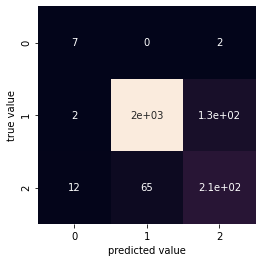

In [33]:
sns.heatmap(mat, square=True, annot=True, cbar = False)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [34]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model1 = KNeighborsClassifier(n_neighbors = 12)

In [48]:
model1.fit(Xtrain, ytrain)
y_model1=model1.predict(Xtest)
model1.score(Xtest, ytest)

0.8855218855218855

In [45]:
model1_under = KNeighborsClassifier(n_neighbors = 12)
model1_under.fit(Xtrain_under, ytrain_under)
y_model1_under=model1_under.predict(Xtest)
model1_under.score(Xtest, ytest)

0.12037037037037036

In [67]:
model1_sm = KNeighborsClassifier(n_neighbors = 12)
model1_sm.fit(Xtrain_sm, ytrain_sm)
y_model1_sm=model1_under.predict(Xtest)
model1_sm.score(Xtest, ytest)

0.6380471380471381

In [40]:
cv_results=cross_validate(model1, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.01568198, 0.00826693, 0.00716591, 0.00734401, 0.00813794]),
 'score_time': array([0.33490276, 0.32016301, 0.31668305, 0.30842304, 0.30618405]),
 'test_score': array([0.88690163, 0.87578947, 0.88105263, 0.87421053, 0.88578947])}

In [41]:
cv_results=cross_validate(model1_under, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.03884006, 0.00754523, 0.00754285, 0.00735569, 0.0075779 ]),
 'score_time': array([0.42933297, 0.38751006, 0.31645608, 0.3181231 , 0.30553484]),
 'test_score': array([0.89110994, 0.87736842, 0.88052632, 0.88105263, 0.87631579])}

In [68]:
cv_results=cross_validate(model1_sm, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.0138042 , 0.00827408, 0.00763488, 0.00923896, 0.00748801]),
 'score_time': array([0.416924  , 0.31859612, 0.30995512, 0.31834006, 0.3070693 ]),
 'test_score': array([0.87112046, 0.89315789, 0.87526316, 0.88894737, 0.87894737])}

In [49]:
mat1 = confusion_matrix(ytest, y_model1)
mat1

array([[   0,    9,    0],
       [   0, 2037,   44],
       [   0,  219,   67]])

In [69]:
mat11=confusion_matrix(ytest, y_model1_under)
mat1

array([[   0,    9,    0],
       [   0, 2037,   44],
       [   0,  219,   67]])

In [70]:
mat1_sm=confusion_matrix(ytest, y_model1_sm)
mat1_sm

array([[   0,    0,    9],
       [   0,    0, 2081],
       [   0,    0,  286]])

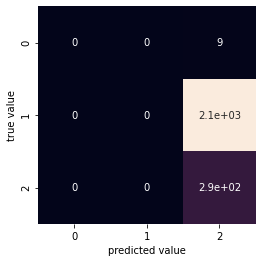

In [44]:
sns.heatmap(mat1, square=True, annot=True, cbar = False)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [50]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr=DecisionTreeRegressor(max_depth = 12)
X1train, X1test, y1train, y1test = train_test_split(X, y1, random_state = 1)

In [51]:
dtr.fit(X1train, y1train)

DecisionTreeRegressor(max_depth=12)

In [52]:
y_dtr=dtr.predict(X1test)

In [70]:
cv_results=cross_validate(dtr, X, y1, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.02101302, 0.01836491, 0.01547861, 0.01531005, 0.01661181]),
 'score_time': array([0.00491166, 0.00230813, 0.00188637, 0.00186706, 0.0018611 ]),
 'test_score': array([0.96228508, 0.95338103, 0.95745648, 0.95712074, 0.95916254])}

In [31]:
dtr.score(X1test, y1test)

0.9534731468496402

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
dt_y=dt.predict(Xtest)
dt.score(Xtest, ytest)

0.984006734006734

In [54]:
dt_under = DecisionTreeClassifier()
dt_under.fit(Xtrain_under, ytrain_under)
dt_y_under=dt.predict(Xtest)
dt_under.score(Xtest, ytest)

0.7672558922558923

In [71]:
dt_sm = DecisionTreeClassifier()
dt_sm.fit(Xtrain_sm, ytrain_sm)
dt_y_sm=dt.predict(Xtest)
dt_sm.score(Xtest, ytest)

0.8636363636363636

In [138]:
dt_over = DecisionTreeClassifier()
dt_over.fit(Xtrain_over, ytrain_over)
dt_y_over=dt.predict(Xtest)
dt_over.score(Xtest, ytest)

0.9823232323232324

In [139]:
mat_dt = confusion_matrix(ytest, dt_y_over)
mat_dt

array([[   1,    0,    8],
       [   0, 2075,    6],
       [   6,   18,  262]])

In [55]:
cv_results=cross_validate(dt, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.02870393, 0.02335095, 0.01853013, 0.0185113 , 0.01874185]),
 'score_time': array([0.00320721, 0.00294089, 0.00291586, 0.00305676, 0.00312304]),
 'test_score': array([0.98527091, 0.98157895, 0.98684211, 0.98684211, 0.98      ])}

In [56]:
cv_results=cross_validate(dt_under, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.02577329, 0.02177382, 0.01865077, 0.01800704, 0.01664186]),
 'score_time': array([0.00418091, 0.00270915, 0.00277114, 0.00274801, 0.0028162 ]),
 'test_score': array([0.9879011 , 0.98473684, 0.97947368, 0.98368421, 0.98526316])}

In [57]:
mat_dt = confusion_matrix(ytest, dt_y)
mat_dt

array([[   1,    0,    8],
       [   0, 2075,    6],
       [   6,   18,  262]])

In [60]:
mat_dt_under=confusion_matrix(ytest,dt_y_under)
mat_dt_under

array([[   1,    0,    8],
       [   0, 2075,    6],
       [   6,   18,  262]])

In [72]:
mat_dt_sm=confusion_matrix(ytest,dt_y_sm)
mat_dt_sm

array([[   1,    0,    8],
       [   0, 2075,    6],
       [   6,   18,  262]])

In [74]:
from sklearn.ensemble import AdaBoostClassifier
Adb = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)

# train AdaBoost on our data
np.random.seed(1111)
Adb.fit(Xtrain, ytrain)
adb_y=Adb.predict(Xtest)

In [46]:
Adb.score(Xtest, ytest)

0.9255050505050505

In [75]:
Adb_sm = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)

# train AdaBoost on our data
np.random.seed(1111)
Adb_sm.fit(Xtrain_sm, ytrain_sm)
adb_y_sm=Adb.predict(Xtest)
Adb_sm.score(Xtest, ytest)

0.8156565656565656

In [126]:
model = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)
over = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model)]
pipeline_adb = Pipeline(steps=steps)

pipeline_adb.fit(Xtrain, ytrain)
y_pipe_adb=pipeline_adb.predict(Xtest)
pipeline_adb.score(Xtest, ytest)

0.8156565656565656

In [127]:
mat_adb = confusion_matrix(ytest, adb_y)
mat_adb

array([[   0,    0,    9],
       [   0, 2018,   63],
       [   0,  105,  181]])

In [128]:
mat_adb_sm=confusion_matrix(ytest, adb_y_sm)
mat_adb_sm

array([[   0,    0,    9],
       [   0, 2018,   63],
       [   0,  105,  181]])

In [129]:
mat_adb_pipe=confusion_matrix(ytest, y_pipe_adb)
mat_adb_pipe

array([[   8,    0,    1],
       [   8, 1759,  314],
       [  68,   47,  171]])

In [140]:
model = AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=10), random_state=42)
over = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model1)]
pipeline_adb_1 = Pipeline(steps=steps)

pipeline_adb_1.fit(Xtrain, ytrain)
y_pipe_adb_1=pipeline_adb.predict(Xtest)
pipeline_adb_1.score(Xtest, ytest)

0.6372053872053872

In [141]:
mat_adb_pipe1=confusion_matrix(ytest, y_pipe_adb_1)
mat_adb_pipe1

array([[   8,    0,    1],
       [   8, 1759,  314],
       [  68,   47,  171]])

In [55]:
cv_results=cross_validate(Adb, X, y2, cv=kf, return_train_score=False)
cv_results

{'fit_time': array([0.04842067, 0.03181982, 0.0289669 , 0.02981997, 0.03110313]),
 'score_time': array([0.00532722, 0.00351501, 0.00350213, 0.00454283, 0.00421381]),
 'test_score': array([0.93161494, 0.92315789, 0.92473684, 0.93526316, 0.93      ])}

In [150]:
model2 = AdaBoostClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(max_depth=24), random_state=42)
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model2)]
pipeline_adb_2 = Pipeline(steps=steps)

pipeline_adb_2.fit(Xtrain, ytrain)
y_pipe_adb_2=pipeline_adb.predict(Xtest)
pipeline_adb_2.score(Xtest, ytest)

0.9865319865319865

In [151]:
mat_adb_pipe2=confusion_matrix(ytest, y_pipe_adb_2)
mat_adb_pipe2

array([[   8,    0,    1],
       [   8, 1759,  314],
       [  68,   47,  171]])

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
over = SMOTE()
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model)]
pipeline_lr = Pipeline(steps=steps)

pipeline_lr.fit(Xtrain, ytrain)
y_pipe_lr=pipeline_adb.predict(Xtest)
pipeline_lr.score(Xtest, ytest)

/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8051346801346801

In [156]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', model)]
pipeline_lr1 = Pipeline(steps=steps)

pipeline_lr1.fit(Xtrain, ytrain)
y_pipe_lr1=pipeline_adb.predict(Xtest)
pipeline_lr1.score(Xtest, ytest)

/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9478114478114478

In [158]:
mat_lr_pipe1=confusion_matrix(ytest, y_pipe_lr1)
mat_lr_pipe1

array([[   8,    0,    1],
       [   8, 1759,  314],
       [  68,   47,  171]])

In [152]:
mat_lr_pipe=confusion_matrix(ytest, y_pipe_lr)
mat_lr_pipe

array([[   8,    0,    1],
       [   8, 1759,  314],
       [  68,   47,  171]])

In [105]:
#idea to use clasters 
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(X)
X['clusters'] = clustering.labels_
X['clusters'] = X['clusters'].astype('category')

In [111]:
(X['clusters']==df['class']).sum()

2238